# 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# 2. Loading and exploring the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2]:
df = pd.read_csv("FIFA2019.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 18207 rows and 88 columns.


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18070,236705,E. Dahlqvist,19,https://cdn.sofifa.org/players/4/19/236705.png,Sweden,https://cdn.sofifa.org/flags/46.png,50,64,IFK Göteborg,https://cdn.sofifa.org/teams/2/light/319.png,€60K,€1K,1337,Left,1.0,3.0,2.0,Medium/ Medium,Lean,No,LWB,33.0,"Nov 6, 2016",NaN,2021,5'6,154lbs,39+2,39+2,39+2,43+2,41+2,41+2,41+2,43+2,42+2,42+2,42+2,44+2,42+2,42+2,42+2,44+2,48+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,40.0,26.0,37.0,41.0,22.0,44.0,30.0,26.0,36.0,45.0,62.0,57.0,73.0,48.0,84.0,23.0,92.0,64.0,57.0,25.0,53.0,51.0,43.0,36.0,31.0,52.0,40.0,48.0,51.0,8.0,7.0,12.0,13.0,12.0,€113K
5073,233301,R. Nissen Kristensen,20,https://cdn.sofifa.org/players/4/19/233301.png,Denmark,https://cdn.sofifa.org/flags/13.png,70,79,Ajax,https://cdn.sofifa.org/teams/2/light/245.png,€2.4M,€6K,1855,Right,1.0,3.0,3.0,High/ High,Normal,No,RB,2.0,"Jan 23, 2018",NaN,2022,6'1,154lbs,65+2,65+2,65+2,65+2,65+2,65+2,65+2,65+2,64+2,64+2,64+2,67+2,66+2,66+2,66+2,67+2,69+2,68+2,68+2,68+2,69+2,69+2,67+2,67+2,67+2,69+2,66.0,53.0,65.0,67.0,49.0,65.0,68.0,36.0,66.0,67.0,75.0,76.0,66.0,69.0,59.0,73.0,73.0,87.0,74.0,49.0,70.0,67.0,67.0,63.0,45.0,72.0,66.0,66.0,64.0,10.0,9.0,9.0,6.0,10.0,€3.8M
14368,231064,T. Hudson-Wihongi,23,https://cdn.sofifa.org/players/4/19/231064.png,New Zealand,https://cdn.sofifa.org/flags/198.png,61,67,NaN,https://cdn.sofifa.org/flags/198.png,€0,€0,1613,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CDM,21.0,NaN,NaN,NaN,6'1,183lbs,53+2,53+2,53+2,56+2,55+2,55+2,55+2,56+2,57+2,57+2,57+2,58+2,58+2,58+2,58+2,58+2,59+2,60+2,60+2,60+2,59+2,59+2,60+2,60+2,60+2,59+2,53.0,45.0,60.0,62.0,27.0,57.0,46.0,37.0,61.0,60.0,70.0,65.0,62.0,56.0,60.0,41.0,62.0,68.0,70.0,48.0,72.0,58.0,50.0,56.0,52.0,65.0,56.0,58.0,57.0,10.0,6.0,6.0,14.0,8.0,NaN
6757,234022,Adrián Maideira,34,https://cdn.sofifa.org/players/4/19/234022.png,Brazil,https://cdn.sofifa.org/flags/54.png,68,68,Vitória,https://cdn.sofifa.org/teams/2/light/1719.png,€450K,€6K,1753,Left,1.0,3.0,3.0,Medium/ Medium,Normal,No,CAM,10.0,"Jan 1, 2018",NaN,2021,5'7,146lbs,67+2,67+2,67+2,68+2,68+2,68+2,68+2,68+2,67+2,67+2,67+2,66+2,61+2,61+2,61+2,66+2,53+2,50+2,50+2,50+2,53+2,51+2,44+2,44+2,44+2,51+2,55.0,67.0,54.0,70.0,66.0,68.0,65.0,62.0,51.0,63.0,80.0,79.0,82.0,70.0,75.0,70.0,58.0,66.0,58.0,72.0,52.0,33.0,71.0,58.0,68.0,59.0,15.0,41.0,38.0,8.0,8.0,9.0,8.0,13.0,€855K
7829,246056,E. Vega,28,https://cdn.sofifa.org/players/4/19/246056.png,Ecuador,https://cdn.sofifa.org/flags/57.png,67,68,NaN,https://cdn.sofifa.org/flags/57.png,€0,€0,1706,Right,1.0,3.0,3.0,Medium/ Medium,Stocky,No,CDM,17.0,NaN,NaN,NaN,5'6,152lbs,52+2,52+2,52+2,56+2,55+2,55+2,55+2,56+2,57+2,57+2,57+2,60+2,62+2,62+2,62+2,60+2,65+2,66+2,66+2,66+2,65+2,65+2,64+2,64+2,64+2,65+2,55.0,19.0,67.0,70.0,12.0,66.0,48.0,59.0,68.0,66.0,68.0,65.0,63.0,64.0,77.0,66.0,66.0,79.0,64.0,41.0,71.0,68.0,38.0,55.0,60.0,54.0,59.0,64.0,62.0,11.0,14.0,9.0,6.0,6.0,NaN
8497,202179,Z. Ismail,24,https://cdn.sofifa.org/players/4/19/202179.png,England,https://cdn.sofifa.org/flags/14.png,67,70,Walsall,https://cdn.sofifa.org/teams/2/light/1803.png,€975K,€3K,1688,Right,1.0,5.0,4.0,High/ Medium,Normal,No,RM,10.0,"Jul 1, 2018",NaN,2019,5'10,165lbs,62+2,62+2,62+2,66+2,64+2,64+2,64+2,66+2,64+2,64+2,64+2,66+2,59+2,59+2,59+2,66+2,53+2,48+2,48+2,48+2,53+2,50+2,41+2,41+2,41+2,50+2,57.0,60.0,45.0

Looking at these 10 random rows, we can see that it'll be safe to drop a few columns right away. The `Photo`, `Flag`, and `Club Logo` column all contain URLs to images which we won't be using, so these can be safely dropped. Similarly, since we aren't trying to match this dataset to anything else, we can drop the included `ID` and just work with a default integer ID if needed. I'm also dropping `Real Face` since that seems to be an indicator of whether or not the player's real face was used for the character model and that's not something we care about for this analysis as it's unrelated to the player's statistics. Similarly `Jersey Number` won't be used.

We can also see that right now there are some columns that are represented as strings but that we really will want to be numeric. This includes columns like `Release Clause` which needs to be turned from an amount of Euros into just a number, and columns like the position ratings (e.g. `LS` and `ST`) which look something like `66+2` (when they're not missing).

This preview also shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later. `Loaned From` in particular has lots of missing values.

In [3]:
df.drop(['ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number'],axis=1,inplace=True)

In [4]:
df.info()  # down to 82 columns after the initial 88

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [5]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Loaned From                 16943
RDM                          2085
LM                           2085
CB                           2085
LCB                          2085
LB                           2085
RWB                          2085
CDM                          2085
LDM                          2085
LWB                          2085
RM                           2085
RCM                          2085
CM                           2085
LCM                          2085
RAM                          2085
RB                           2085
CAM                          2085
LAM                          2085
RW                           2085
RF                           2085
CF                           2085
LF                           2085
LW                           2085
RS                           2085
ST                           2085
LS                           2085
RCB                          2085
Release Clause               1564
Joined                       1553
Contract Valid

It looks like there are blocks of similar features with the exact same number of missing values. I hypothesize that this is due to a player having either all or none of those features filled in.

# 3. Processing columns

I want to get summary statistics and start getting a sense of the distributions of these variables and how they relate to each other, but first I need to turn many of these into numeric columns.

### Columns containing Euro amounts

There are some columns that represent money amounts. The values all begin with `€` and may have a `K` or `M` to represent thousands or millions. First I want to detect which columns fit this pattern, and then I'll turn these into numbers. 

In [6]:
# this loop prints the names of the columns where there is
# at least one entry beginning the character '€'
money_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.startswith('€').any():  # using `.str` so I can use an element-wise string method
        money_cols.append(colname)
print(money_cols)

['Value', 'Wage', 'Release Clause']


I'm building this list automatically rather than manually entering the columns. In general this is a good practice because if I just did a quick manual skim, I might miss some columns. It'd be a good idea though to also look at the data and confirm that I haven't missed any columns that I can see have euros in them.

In [7]:
def income_to_num(income_val):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(income_val, str):  # checks if `income_val` is a string
        multiplier = 1  # handles K vs M salaries
        if income_val.endswith('K'):
            multiplier = 1000
        elif income_val.endswith('M'):
            multiplier = 1000000
        return float(income_val.replace('€', '').replace('K', '').replace('M', '')) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

for colname in money_cols:
    df[colname] = df[colname].apply(income_to_num)
    
df[money_cols].head()  # good to go!

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0


What are some ways that this processing could be made more robust? (hint: what would happen if there's leading or trailing whitespace?)


### Position ratings

For these, we have columns that are strings containing a mix of values like `"64+2"` and `np.nan`. We will process these by just taking the number before the `+` symbol for the non-missing values, while the `np.nan`s will stay as such.

In [8]:
def position_to_num(pos_val):
    """For each value, take the number before the '+'
    unless it is not a string value. This will only happen
    for NaNs so in that case we just return NaN.
    """
    if isinstance(pos_val, str):
        return float(pos_val.split('+')[0])
    else:
        return np.nan

position_cols = [
    'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
    'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
    'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
    'LCB', 'CB', 'RCB', 'RB'
]

for colname in position_cols:
    df[colname] = df[colname].apply(position_to_num)


### height and weight

These also need to be turned into numerics.

In [9]:
def height_to_num(height):
    """Converts a height of the form 5'11 (i.e. feet then inches) to inches
    and makes it an integer. Non-string heights are treated as missing."""
    if isinstance(height, str):
        splt = height.split("'")
        return float(splt[0]) * 12 + float(splt[1])
    else:
        return np.nan
    
    
def weight_to_num(weight):
    """In the weight column I'm replacing the terminal 'lbs' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(weight, str):
        return float(weight.replace('lbs', ''))
    else:
        return np.nan
    
    
    
# I could just do this by copy-pasting one line and editing which column and
# which function I'm using for each one in turn. With only two columns
# that's not so bad, but it gets cumbersome quickly

# df['Height'] = df['Height'].apply(height_to_num)
# df['Weight'] = df['Weight'].apply(weight_to_num)

# A more general way is to collect the columns and column-processing functions
# into a data structure and loop over that. That avoids bugs like forgetting to
# change the second 'Height' into 'Weight' when I copy-paste the first line.
# Here, the keys of the dictionary are the column names and the values are 
# the function that I'll use to replace that column's values. I now don't
# have to worry about mixing up column names and processing functions.
col_transforms = {
    'Height': height_to_num,
    'Weight': weight_to_num
}

# k is the key, so the column name here
# v is the value, which a function in this case and is
#     either `height_to_num` or `weight_to_num`
for k,v in col_transforms.items():
    df[k] = df[k].map(v)


### converting `Joined` to datetime and adding in year of joining

In [10]:
df['Joined'] = pd.to_datetime(df['Joined'])
df['Joined year'] = df['Joined'].dt.year  # adding in a feature that's just the year
print(min(df['Joined']), max(df['Joined']))
df['Joined'].head()

1991-06-01 00:00:00 2018-12-20 00:00:00


0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]

In [11]:
# investigating the players with this earliest Joined date
df[df['Joined'] == min(df['Joined'])]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined year
4741,O. Pérez,45,Mexico,71,71,Pachuca,160000.0,8000.0,1256,Right,2.0,3.0,1.0,Medium/ Medium,Stocky,GK,1991-06-01,NaN,2021,68.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,14.0,24.0,26.0,13.0,12.0,12.0,20.0,27.0,23.0,60.0,57.0,69.0,72.0,69.0,24.0,85.0,41.0,66.0,18.0,26.0,12.0,12.0,40.0,23.0,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,272000.0,1991.0


I googled this player and it seems to be [Óscar Pérez Rojas](https://en.wikipedia.org/wiki/%C3%93scar_P%C3%A9rez_Rojas). I was surprised by the time between his `Joined` date and `Contract Valid Until` but apparently he had a very long career and these values are plausible.

### splitting `Work Rate` into two columns

In [12]:
df["Work Rate"].head()

0    Medium/ Medium
1         High/ Low
2      High/ Medium
3    Medium/ Medium
4        High/ High
Name: Work Rate, dtype: object

In [13]:
workrt = df["Work Rate"].str.split("/ ", n = 1, expand = True) 
workrt.head()

,0,1
0,Medium,Medium
1,High,Low
2,High,Medium
3,Medium,Medium
4,High,High


In [14]:
df.drop(['Work Rate'], axis=1, inplace=True)
df["Workrate_attack"]= workrt[0]   
df["Workrate_defense"]= workrt[1]

del workrt  # don't need to do this but can keep things tidy

In [15]:
df.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined year,Workrate_attack,Workrate_defense
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,RF,2004-07-01,NaN,2021,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2004.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,2018-07-10,NaN,2022,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2018.0,High,Low


# 4. Feature Engineering

We can always do more, but for now we'll reduce the dimensionality by a lot by replacing many of the columns with summaries of them instead. If these summaries capture most of the meaningful information in those columns then this is a good way to make a dataset more manageable.

In [16]:
# replacing the position columns with attack, midfield, and defense averages
positiontype_to_cols = {
    'Attack': ['LS', 'ST', 'RS', 'LF', 'CF', 'RF'],
    'Midfield': ['LW', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'CDM', 'RDM', 'LDM'],
    'Defense': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
}

for pos_type, colvec in positiontype_to_cols.items():
    df[pos_type + '_rate'] = round(df[colvec].mean(axis=1))

# we've summarized these and are content with these aggregates so we drop these columns
df.drop(position_cols, axis=1, inplace=True)

print(df.shape)  # down to 61 columns

(18207, 61)


Combining a few more statistics to reduce the dimension

In [17]:
summaryname_to_cols = {
    'Passing': ['Crossing', 'ShortPassing', 'LongPassing'],
    'Shooting': ['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower',
                 'LongShots', 'Penalties', 'HeadingAccuracy'],
    'Defending': ['Marking', 'StandingTackle', 'SlidingTackle', 'Interceptions'],
    'Speed': ['SprintSpeed', 'Agility', 'Acceleration', 'Reactions', 'Stamina'],
    'Control': ['BallControl', 'Curve', 'Dribbling'],
    'GoalKeeping': ['GKDiving', 'GKHandling', 'GKPositioning', 'GKKicking', 'GKReflexes'],
    'Mental': ['Composure', 'Vision', 'Aggression', 'Positioning'],
    'Power': ['Strength', 'Balance', 'Jumping'],
    'Avg_rating': ['Overall', 'Potential']
    
}

for summarycol, colvec in summaryname_to_cols.items():
    df[summarycol] = round(df[colvec].mean(axis=1))
    
# now I don't have a vector that contains all of these old columns in one so I need to make it
# this is a "nested list comprehension" and is a common way to flatten a list of lists,
# which is what summaryname_to_cols.values() effectively is, so that the result is a 
# single list. The syntax says to loop colvec through each element of summaryname_to_cols.values(),
# and then within each iteration of that loop we loop colname through colvec and we simply
# keep colvec without doing anything else to it.
cols_to_drop = [colname for colvec in summaryname_to_cols.values() for colname in colvec]
df.drop(cols_to_drop, axis=1, inplace=True)
print(df.shape)  # big reduction in size. Getting much more manageable
df.head(2)

(18207, 34)


,Name,Age,Nationality,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Joined year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating
0,L. Messi,31,Argentina,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Messi,RF,2004-07-01,NaN,2021,67.0,159.0,226500000.0,2004.0,Medium,Medium,90.0,83.0,55.0,87.0,86.0,27.0,87.0,95.0,11.0,83.0,74.0,94.0
1,Cristiano Ronaldo,33,Portugal,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,2018-07-10,NaN,2022,74.0,183.0,127100000.0,2018.0,High,Low,90.0,80.0,59.0,81.0,88.0,28.0,90.0,88.0,12.0,84.0,81.0,94.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Club                      17966 non-null  object        
 4   Value                     18207 non-null  float64       
 5   Wage                      18207 non-null  float64       
 6   Special                   18207 non-null  int64         
 7   Preferred Foot            18159 non-null  object        
 8   International Reputation  18159 non-null  float64       
 9   Weak Foot                 18159 non-null  float64       
 10  Skill Moves               18159 non-null  float64       
 11  Body Type                 18159 non-null  object        
 12  Position          

Now everything that should be numeric indeed is and we can start looking at summary statistics.

# 5. Basic summary statistics and consequences

This is EDA not data preprocessing but we need to know what's going on in order to know how to prepare the data for whatever comes next.

In [19]:
df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,2.512221e+01,4.669943e+00,16.0,21.0,25.0,28.0,45.0
Value,18207.0,2.410696e+06,5.594933e+06,0.0,300000.0,675000.0,2000000.0,118500000.0
Wage,18207.0,9.731312e+03,2.199929e+04,0.0,1000.0,3000.0,9000.0,565000.0
Special,18207.0,1.597810e+03,2.725860e+02,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222e+00,3.940308e-01,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299e+00,6.604563e-01,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308e+00,7.561641e-01,1.0,2.0,2.0,3.0,5.0
Height,18159.0,7.136125e+01,2.649664e+00,61.0,69.0,71.0,73.0,81.0
Weight,18159.0,1.659791e+02,1.559334e+01,110.0,154.0,165.0,176.0,243.0
Release Clause,16643.0,4.585061e+06,1.111872e+07,13000.0,525000.0,1100000.0,3500000.0,228100000.0


In [20]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

J. Rodríguez    11
Paulinho         8
R. Williams      7
J. Williams      7
J. Valencia      6
J. Hernández     6
J. Gómez         6
Felipe           6
J. Martínez      5
J. Torres        5
Name: Name, dtype: int64
Only displaying first 10 of 17194 values.



England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64
Only displaying first 10 of 164 values.



NaN                    241
Chelsea                 33
Manchester United       33
Frosinone               33
Eintracht Frankfurt     33
Burnley                 33
CD Leganés              33
Southampton             33
Newcastle United        33
Arsenal                 33
Name: Club, dtype: int64
Only displaying first 10 of 652 values.



Right    13948
Left      4211
NaN         48
Name: Preferred Foot, dtype: int64



Normal                 10595
Lean           

In the `Body Type` column there are a few famous players that just have their own name as their body type, in addition to one player with a value of `PLAYER_BODY_TYPE_25`. 

There are also values in `Contract Valid Until` that don't look valid.

This is an example of how EDA, like looking at these distributions, shows more preprocessing to do.

#### Fixing `Body Type`

In [21]:
df[df['Body Type'] == 'PLAYER_BODY_TYPE_25']

,Name,Age,Nationality,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Joined year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating
26,M. Salah,26,Egypt,Liverpool,69500000.0,255000.0,2146,Left,3.0,3.0,4.0,PLAYER_BODY_TYPE_25,RM,2017-07-01,NaN,2023,69.0,157.0,137300000.0,2017.0,High,Medium,84.0,80.0,63.0,77.0,72.0,44.0,90.0,87.0,12.0,82.0,75.0,88.0


M. Salah is also quite famous so that fits this pattern of a few famous players not having one of the three listed body types.

For our later analyses it won't be helpful to have this categorical variable with some values that only appear once, so I'll do my best to assign those players to one of the thrree listed body types.

In [22]:
df.loc[df['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Neymar', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Shaqiri', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'Messi', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'Courtois', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Stocky'
# why do these work with NaNs?

df['Body Type'].value_counts(dropna=False)

Normal    10595
Lean       6421
Stocky     1143
NaN          48
Name: Body Type, dtype: int64

#### Fixing `Contract Valid Until`

In [23]:
df['Contract Valid Until'].value_counts(dropna=False)

2019            4819
2021            4360
2020            4027
2022            1477
2023            1053
Jun 30, 2019     931
2018             886
NaN              289
Dec 31, 2018     144
May 31, 2019      60
Jan 1, 2019       51
2024              23
Jun 30, 2020      14
Jan 31, 2019      13
2025               7
Jan 5, 2019        6
Jan 2, 2019        6
Oct 14, 2019       5
Jan 12, 2019       5
Jan 6, 2019        4
Dec 31, 2019       3
Jan 7, 2019        3
Jan 25, 2019       3
Nov 30, 2018       2
2026               2
May 31, 2020       2
Dec 1, 2019        2
Jan 15, 2019       1
May 4, 2019        1
Jun 1, 2019        1
Jan 3, 2019        1
Feb 27, 2020       1
Jan 20, 2019       1
Jan 11, 2019       1
Jan 30, 2019       1
Jan 4, 2019        1
Jan 18, 2019       1
Name: Contract Valid Until, dtype: int64

In [24]:
contract_dates = pd.to_datetime(df['Contract Valid Until']).dt.year
print(contract_dates.value_counts(dropna=False))
df['Contract Valid Until'] = contract_dates

2019.0    5920
2021.0    4360
2020.0    4044
2022.0    1477
2023.0    1053
2018.0    1032
NaN        289
2024.0      23
2025.0       7
2026.0       2
Name: Contract Valid Until, dtype: int64


### Distributions

In [25]:
# df['is_GK'] = df['Position'] == 'GK'  # for hue
# cols_to_exclude = ['International Reputation', 'Weak Foot', 'Skill Moves']
# sns.pairplot(df[[colname for colname in df.columns if colname not in cols_to_exclude]], hue = 'is_GK')
# df.drop(['is_GK'], axis=1, inplace=True)

There are some really tightly correlated ones in there. I'll drop some of those.

In [26]:
df.drop(['Release Clause'], axis=1, inplace=True)

### Log transformation

Some features are very skewed and will likely behave better on the log scale.

I'll transform both `Wage` and `Value`.

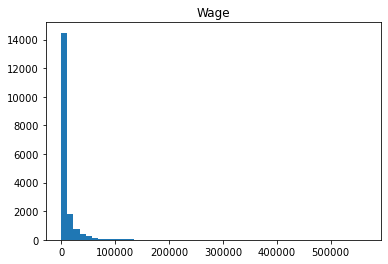

241


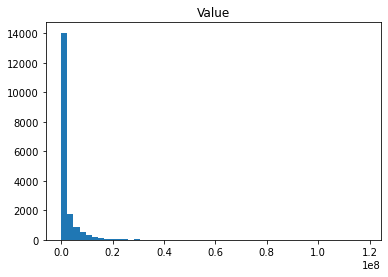

252


In [27]:
cols_to_log = ['Wage', 'Value']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

Unfortunately there are some non-positive values (in this case, exact zeros) so we can't directly take the log of these numbers.

We have a couple options. One is to just add some small positive value to every element of these columns so that the log is defined on every value in the column we're transforming. In this case, since these are like counts, we could just add $1$ since $1$ euro is tiny compared to the amounts described by these variables, so we're not changing the data in a meaningful way.

But sometimes the context is such that it is not acceptable to change the data by adding something. In these cases we'll want to consider other transformations. One option is to use a power like `sqrt` which is like a weaker log transform but it can handle zeros. Another option is to use `np.arcsinh` which is like the log for large values but handles negative and zero values as well.

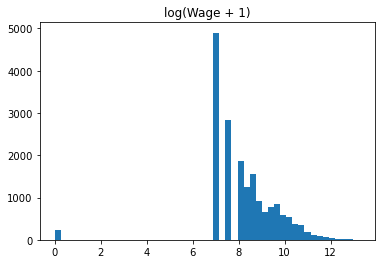

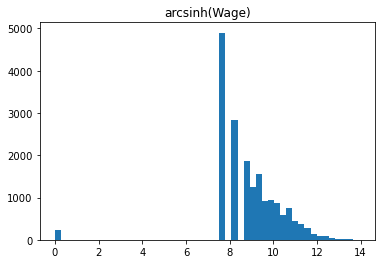

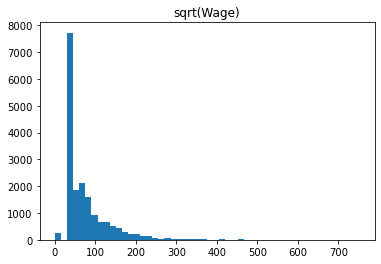

In [28]:
plt.hist(np.log(df['Wage'] + 1), 50)
plt.title('log(Wage + 1)')
plt.show()
plt.hist(np.arcsinh(df['Wage']), 50)
plt.title('arcsinh(Wage)')
plt.show()
plt.hist(np.sqrt(df['Wage']), 50)
plt.title('sqrt(Wage)')
plt.show()

All three have helped but the sqrt is not quite strong enough and the result is still too skewed in my opinion, so I prefer the log or arcsinh. The log and arcsinh look similar so the difference there is more be about interpretation. It will likely be easier to explain the log of a number to someone than the arcsinh of a number since that's a less known transformation, so if this is for a client or something similar I'd likely choose log(Wage + 1), but if this is just for my own internal use I'd pick arcsinh since I prefer to use transformations that naturally are defined on all the values I have rather than needing to modify the data first.

In [29]:
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

The log transformation decreases the scale of the distributions, even with the huge range of Wage. It seems the outliers caused the log-transformed distributions to still be a bit skewed, but it is closer to normal than the original distribution.

### Binning

Generally it's better to keep continuous features as such, but sometimes binning is necessary so we'll do an example of that here with `Height`.

In [30]:
# Height is in inches
binned_ht = pd.cut(df['Height'], [-np.inf, 5*12, 5*12+6, 6*12, np.inf])
binned_ht

0        (66.0, 72.0]
1         (72.0, inf]
2        (66.0, 72.0]
3         (72.0, inf]
4        (66.0, 72.0]
             ...     
18202    (66.0, 72.0]
18203     (72.0, inf]
18204    (66.0, 72.0]
18205    (66.0, 72.0]
18206    (66.0, 72.0]
Name: Height, Length: 18207, dtype: category
Categories (4, interval[float64]): [(-inf, 60.0] < (60.0, 66.0] < (66.0, 72.0] < (72.0, inf]]

In [31]:
binned_ht.value_counts(dropna=False)

(66.0, 72.0]    11608
(72.0, inf]      6034
(60.0, 66.0]      517
NaN                48
(-inf, 60.0]        0
Name: Height, dtype: int64

In [32]:
# can add custom labels
df['height_bin'] = pd.cut(
    df['Height'], [-np.inf, 5*12, 5*12+6, 6*12, np.inf], 
    labels = ["Under 5'", "5' to 5'6", "5'6 to 6'", "Over 6'"]
)
df.drop(['Height'], axis=1, inplace=True)
df['height_bin'].value_counts(dropna=False)


5'6 to 6'    11608
Over 6'       6034
5' to 5'6      517
NaN             48
Under 5'         0
Name: height_bin, dtype: int64

### Changing units

We'll change the units of `Weight` to be in kg instead of lbs

In [33]:
print(df['Weight'].head(2))
df['Weight'] = df['Weight'].apply(lambda wt: round(wt * 0.4535, 2))
df['Weight'].head(2)

0    159.0
1    183.0
Name: Weight, dtype: float64


0    72.11
1    82.99
Name: Weight, dtype: float64

### Making categoricals into categorical types

In [34]:
cat_vars = ['Preferred Foot', 'Body Type', 'Position',
            'Workrate_attack', 'Workrate_defense']
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Club                      17966 non-null  object        
 4   Special                   18207 non-null  int64         
 5   Preferred Foot            18159 non-null  category      
 6   International Reputation  18159 non-null  float64       
 7   Weak Foot                 18159 non-null  float64       
 8   Skill Moves               18159 non-null  float64       
 9   Body Type                 18159 non-null  category      
 10  Position                  18147 non-null  category      
 11  Joined                    16654 non-null  datetime64[ns]
 12  Loaned From       

### Text processing

I'll do a few text processing things here as examples.

In [35]:
# how many players are in clubs that start with 'FC'?
df['Club'].str.startswith('FC').sum()

1007

In [36]:
# how many letters and words in the unique club names?

# doing i == i as a quick check for NaNs
# using .title() in case of capitalization issues
club_data = pd.DataFrame(
    data = [(i, len(i), len(i.split())) if i == i else (i, 0, 0)
            for i in df['Club'].str.strip().str.title().unique()],
    columns = ['Club', 'Number of Letters', 'Number of Words']
)
club_data.head()

,Club,Number of Letters,Number of Words
0,Fc Barcelona,12,2
1,Juventus,8,1
2,Paris Saint-Germain,19,2
3,Manchester United,17,2
4,Manchester City,15,2


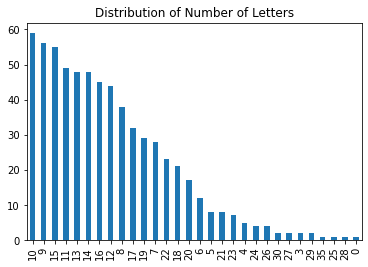

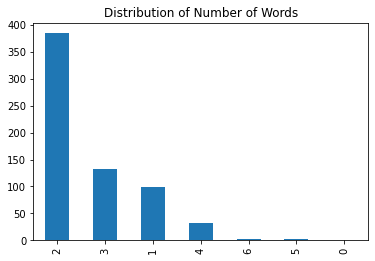

These are the clubs with the most words in the name:


191    Chongqing Dangdai Lifan Fc Swm Team
276             Cd Everton De Viña Del Mar
Name: Club, dtype: object

In [37]:
club_data['Number of Letters'].value_counts().plot.bar()
plt.title('Distribution of Number of Letters')
plt.show()

club_data['Number of Words'].value_counts().plot.bar()
plt.title('Distribution of Number of Words')
plt.show()

print('These are the clubs with the most words in the name:')
club_data.loc[club_data['Number of Words'] == club_data['Number of Words'].max(), 'Club']

### Standardizing continuous features

For some features maybe it makes more sense to have the values be how many standard deviations from the mean that player is. This would be done via a z-transformation.

In other cases, we might want to make sure that all of the values are between 0 and 1. This can be done with minmax scaling.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

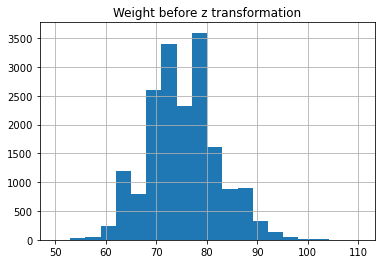

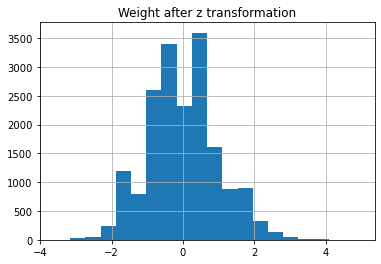

In [39]:
std_scaler = StandardScaler()

df['Weight'].hist(bins=20)
plt.title('Weight before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Weight_z_std'] = std_scaler.fit_transform(df[['Weight']])
df['Weight_z_std'].hist(bins=20)
plt.title('Weight after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
df.drop(['Weight'], axis=1, inplace=True)

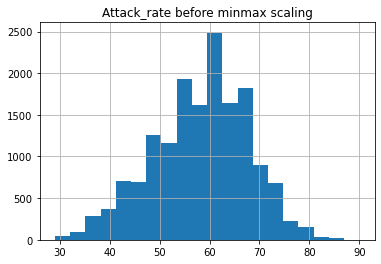

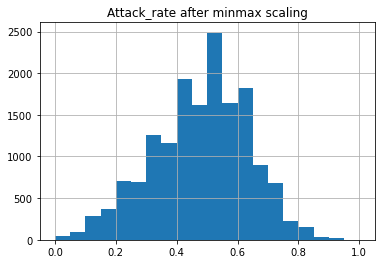

In [40]:
# replacing with scaled 
df['Attack_rate'].hist(bins=20)
plt.title('Attack_rate before minmax scaling')
plt.show()

df[['Attack_rate', 'Midfield_rate', 'Defense_rate']] = MinMaxScaler().fit_transform(
    df[['Attack_rate', 'Midfield_rate', 'Defense_rate']]
)

df['Attack_rate'].hist(bins=20)
plt.title('Attack_rate after minmax scaling')
plt.show()

# if the minimum and maximum are treated as fixed, this is also a linear transformation
# so the shape is the same

Min-Max scaler doesn’t reduce the skewness of a distribution. It simply shifts the distribution to a smaller scale [0–1]. For this reason, it seems Min-Max scaler isn’t the best choice for a distribution with outliers or severe skewness.

The standard scaler assumes features are normally distributed and will scale them to have a mean 0 and standard deviation of 1. Unlike Min-Max scaler the Standard scaler doesn’t have a predetermined range to scale to.

# 6. Missing values

There are lots of ways to handle missing values. 

I'm going to start by investigating the patterns in the missingness.

In [41]:
df.isnull().sum() # lots of columns don't have missingness

Name                            0
Age                             0
Nationality                     0
Club                          241
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Body Type                      48
Position                       60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Joined year                  1553
Workrate_attack                48
Workrate_defense               48
Attack_rate                  2085
Midfield_rate                2085
Defense_rate                 2085
Passing                        48
Shooting                       48
Defending                      48
Speed                          48
Control                        48
GoalKeeping                    48
Mental                         48
Power                          48
Avg_rating                      0
Wage_log      

In [42]:
# counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

1     14751
4      1903
2      1175
5       285
25       48
8        33
9        12
dtype: int64

The `Loaned From` column has a lot of missing values. These could be players who have never been loaned but there could also be players where the value is unknown. Since I'm not particularly interested in this column and I can't confidently separate out those two concepts, I'll drop it.

In [43]:
df.drop(['Loaned From'], axis=1, inplace=True)

In [44]:
# most rows don't have missing values now
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0     14751
3      1903
2      1175
4       196
5        89
24       48
7        33
8        12
dtype: int64

I'll check the rows that have exactly 2 and exactly 3 missing values to see what's going on.

In [45]:
# these are missing `Joined` and `Joined year`
df[num_missing == 2].sample(n=5)

,Name,Age,Nationality,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Joined,Contract Valid Until,Joined year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Wage_log,Value_log,height_bin,Weight_z_std
10533,C. Paredes,20,Paraguay,Portland Timbers,1745,Right,1.0,3.0,2.0,Lean,CM,NaT,2018.0,NaN,Medium,High,0.508197,0.574074,0.618182,63.0,58.0,63.0,66.0,57.0,8.0,58.0,61.0,72.0,9.210440,13.997833,5'6 to 6',-0.062493
10520,D. Atanga,21,Ghana,SpVgg Greuther Fürth,1619,Left,1.0,4.0,2.0,Lean,RM,NaT,2019.0,NaN,Medium,Medium,0.508197,0.500000,0.381818,59.0,48.0,38.0,76.0,56.0,10.0,56.0,59.0,70.0,8.699681,13.652993,5'6 to 6',-1.473849
10578,Hu Jinghang,21,China PR,Henan Jianye FC,1567,Right,1.0,3.0,2.0,Lean,ST,NaT,2018.0,NaN,Medium,Medium,0.540984,0.388889,0.200000,38.0,58.0,14.0,75.0,50.0,12.0,63.0,69.0,69.0,8.294300,13.623140,5'6 to 6',-1.024139
9930,G. Villarruel,25,Argentina,San Martín de San Juan,1656,Right,1.0,3.0,3.0,Lean,RM,NaT,2019.0,NaN,Medium,Low,0.540984,0.518519,0.345455,61.0,55.0,35.0,70.0,64.0,11.0,56.0,61.0,66.0,8.006701,13.422469,5'6 to 6',-1.152829
12591,Shin Chang Moo,25,Korea Republic,Sangju Sangmu FC,1690,Right,1.0,3.0,2.0,Normal,RM,NaT,2019.0,NaN,Medium,Medium,0.491803,0.537037,0.418182,58.0,55.0,44.0,67.0,61.0,11.0,62.0,65.0,64.0,6.908755,13.017005,5'6 to 6',-1.152829


In [46]:
# these are missing `Attack_rate`, `Midfield_rate`, and `Defense_rate`
df[num_missing == 3].sample(n=5)

,Name,Age,Nationality,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Joined,Contract Valid Until,Joined year,Workrate_attack,Workrate_defense,Attack_rate,Midfield_rate,Defense_rate,Passing,Shooting,Defending,Speed,Control,GoalKeeping,Mental,Power,Avg_rating,Wage_log,Value_log,height_bin,Weight_z_std
17440,N. Baumann,22,Switzerland,FC Zürich,1034,Right,1.0,3.0,1.0,Normal,GK,2015-06-16,2023.0,2015.0,Medium,Medium,NaN,NaN,NaN,20.0,17.0,20.0,43.0,15.0,53.0,26.0,62.0,58.0,6.908755,11.156265,Over 6',0.835513
14630,D. Oberhauser,27,France,GFC Ajaccio,988,Right,1.0,2.0,1.0,Normal,GK,2018-07-01,2019.0,2018.0,Medium,Medium,NaN,NaN,NaN,27.0,13.0,16.0,45.0,14.0,60.0,22.0,48.0,62.0,6.908755,12.206078,Over 6',0.962790
6503,Jhonatan,27,Brazil,Moreirense FC,1079,Right,1.0,2.0,1.0,Lean,GK,2017-07-07,2019.0,2017.0,Medium,Medium,NaN,NaN,NaN,21.0,14.0,17.0,41.0,13.0,69.0,31.0,56.0,70.0,8.006701,13.652993,Over 6',0.514494
15913,M. Staniszewski,21,Poland,Arka Gdynia,896,Right,1.0,2.0,1.0,Normal,GK,2018-06-26,2020.0,2018.0,Medium,Medium,NaN,NaN,NaN,23.0,13.0,18.0,29.0,14.0,58.0,31.0,39.0,60.0,6.908755,11.695255,Over 6',0.643184
1213,J. Lössl,29,Denmark,Huddersfield Town,1095,Right,1.0,2.0,1.0,Lean,GK,2018-07-01,2021.0,2018.0,Medium,Medium,NaN,NaN,NaN,29.0,15.0,17.0,38.0,16.0,74.0,34.0,49.0,76.0,10.434145,15.424949,Over 6',1.797158


Overall it looks like the missingness has a structure to it. I'll now do this programatically to investigate this.

In [47]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

For the rows with exactly 2 missing values, NAs are found in:
Joined         1175
Joined year    1175
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Attack_rate      1903
Midfield_rate    1903
Defense_rate     1903
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Club                    196
Joined                  196
Contract Valid Until    196
Joined year             196
dtype: int64



For the rows with exactly 5 missing values, NAs are found in:
Joined           89
Joined year      89
Attack_rate      89
Midfield_rate    89
Defense_rate     89
dtype: int64



For the rows with exactly 7 missing values, NAs are found in:
Club                    33
Joined                  33
Contract Valid Until    33
Joined year             33
Attack_rate             33
Midfield_rate           33
Defense_rate            33
dtype: int64



For the rows with exactly 8 missing values, NAs are found in:
Club                    12
Position      

This confirms that certain columns tend to be missing together or all nonmissing together. How exactly we handle this will depend on what we're doing. For visualization we may just drop the missing values, but for modeling we will likely want to either impute them or use a method that can handle missing predictor values.

I'll demonstrate a few common techniques before moving on.

#### filling in with a standard value

In [48]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
df['height_bin'] = df['height_bin'].astype(str).replace('nan', 'is_missing').astype('category')

In [49]:
# now using `fillna` with a numeric column
print(df['Passing'].isnull().sum())
df['Passing'].fillna(df['Passing'].mean(), inplace=True)  # mean imputation
df['Passing'].isnull().sum()

48


0

Later we'll see how we can use a model to fill in missing values based on similarities in non-missing values.

### Encoding categorical columns

Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. 

Sometimes we want to one-hot encode where every level gets an indicator, but other times we want to drop one level to account for the fact that in a model we will have an intercept.

This is worth doing at the very end because for many earlier analysis tasks (e.g. visualization and value counts) it will be more convenient to keep categorical variables as a single column. Additionally, we'll want to make sure missing values are resolved by this point. 

In [50]:
pd.get_dummies(df['height_bin'], drop_first=True)

,5'6 to 6',Over 6',is_missing
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
18202,1,0,0
18203,0,1,0
18204,1,0,0
18205,1,0,0


In [51]:
# can do one hot encoding with get_dummies
pd.get_dummies(df['height_bin'], drop_first=False).iloc[:10, :]

,5' to 5'6,5'6 to 6',Over 6',is_missing
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,0,1,0


In [52]:
# or we can use sklearn
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder(sparse=False).fit_transform(df[['height_bin']])[:10,:]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

# Outliers

An outlier is a data point that is distant from other similar points. 

Outliers in the data can distort predictions and affect the accuracy so it's important to flag them for review. This is especially the case with regression models.  

The challenge with outlier detection is determining if a point is truly a problem or simply a large value. If a point is genuine then it is very important to keep it in the data as otherwise we're removing the most interesting pdata points. Regardless, it is essential to understand their impact on our predictive models and statistics, and the extent to which a small number of outlying points are dominating the fit of the model (for example, the mean is much more sensitive to outliers than the median). It is left to the best judgement of the investigator to decide whether treating outliers is necessary and how to go about it. Knowledge of domain and impact of the business problem tend to drive this decision.

### Outlier detection using Z-Score

The z-transformation used earlier can flag a point as being far away from the mean. If the data are normally distributed then we expect the vast majority of points to be within 3 standard deviations of the mean, which corresponds to a z score with an absolute value of at most 3. 

If the data are not normal, however, the situation is more complicated.

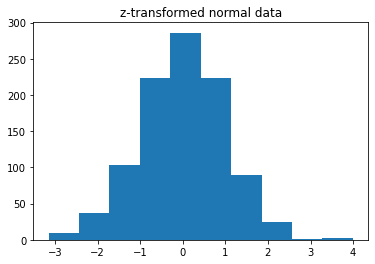

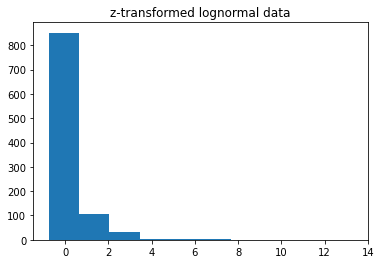

In [53]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()


All of the points in each plot are drawn from the exact same distribution, so it's not fair to call any of the points outliers in the sense of there being bad data. But depending on the distribution in question, we may have almost all of the z-scores between -3 and 3 or instead there could be extremely large values. 

### Outlier detection using IQR

Another way to flag points as outliers is to compute the IQR, which is the interval going from the 1st quartile to the 3rd quartile of the data in question, and then flag a point for investigation if it is outside 1.5 * IQR. 

In [54]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


With the normal data this only flags 5% of the points as suspicious, but with the lognormal data over 13% of the sample is flagged. This again shows how these statistics depend on the underlying distributions and can't be used without the context.

### Applying these to the FIFA data

As an example, we'll look at `Power`.

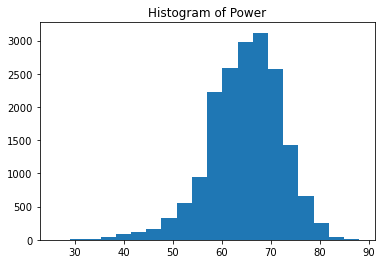

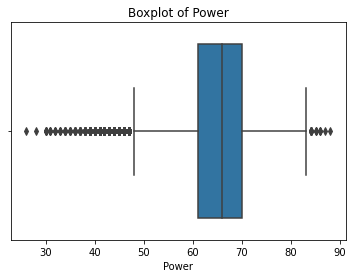

In [55]:
plt.hist(df['Power'], 20)
plt.title('Histogram of Power')
plt.show()

sns.boxplot(df['Power'])
plt.title('Boxplot of Power')
plt.show()

`Power` has a lot of values that are flagged as suspicious by the boxplot, but in the histogram we can see that the distribution is skewed so these points aren't inconsistent with the overall distribution of the data. Nevertheless, having a heavy tail means we might want to consider statistics less sensitive to large values, so e.g. the median may be a better measure of central tendancy. 

#### handling outliers

If we decide that we do actually have some problematic outliers, we have a couple options.

- if the point seems truly nonsensical it may be best to treat it as missing

- alternatively, we could drop that observation or we could use statistics that are robust to outliers

It's often a good idea to examine the sensitivity to outliers by running an analysis with and without them.

In [58]:
quartiles = np.quantile(df['Power'][df['Power'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['Power'] - df['Power'].median()) > power_4iqr, 'Power']
outlier_powers

Q1 = 61.0, Q3 = 70.0, 4*IQR = 36.0


14981    28.0
16765    26.0
Name: Power, dtype: float64

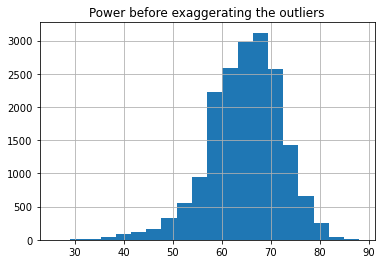

64.78886502560714


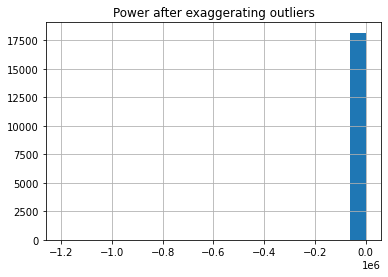

In [59]:
# making the situation more extreme
df['Power'].hist(bins=20)
plt.title('Power before exaggerating the outliers')
plt.show()
print(df['Power'].mean())
df.loc[outlier_powers.index, 'Power'] = [-200000.0, -1200000.0]
df['Power'].hist(bins=20)
plt.title('Power after exaggerating outliers')
plt.show()

In [ ]:
# if we wanted to make these NA we could just do this
# [not run]
df.loc[np.abs(df['Power'] - df['Power'].median()) > power_4iqr, 'Power'] = np.nan

In [ ]:
# dropping these rows
# [not run]
df.drop(outlier_powers.index, axis=0, inplace=True)

In [60]:
power = df['Power'][df['Power'].notnull()]

print(power.mean())  # the mean is being pulled
print(power.median())

-12.31086513574536
66.0


In [61]:
from scipy.stats import tmean

print(tmean(power, limits=np.quantile(power, [.1, .9])))
print(tmean(power, limits=[0,100]))


65.36485686080948
64.79302748251364
